In [1]:
import pandas 
import numpy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os

In [5]:
data = pandas.read_csv('data/imdb_movies.csv')
data.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [12]:
columns = data.columns.values
columns

array(['names', 'date_x', 'score', 'genre', 'overview', 'crew',
       'orig_title', 'status', 'orig_lang', 'budget_x', 'revenue',
       'country'], dtype=object)

In [13]:
data.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


### Number data.

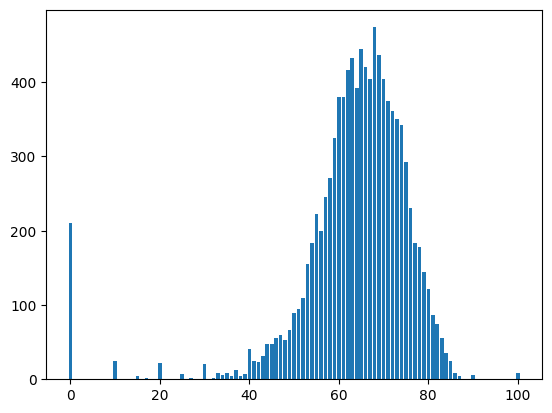

In [15]:
scores = data['score'].values
a, b = numpy.unique(scores, return_counts=True)
plt.bar(a, b)
plt.show()

In [20]:
years = data['date_x'].values.astype(str)
years = [val.replace(' ', '').split('/')[-1] for val in years]
years = numpy.array(years).astype(int)

In [27]:
years_scores = numpy.stack([years, scores]).T
set_years = list(set(years))
years_dict = {}
for val in years_scores:
    if val[0] not in years_dict.keys():
        years_dict.update({val[0]: 1})
        continue
    years_dict[val[0]] += 1

<BarContainer object of 99 artists>

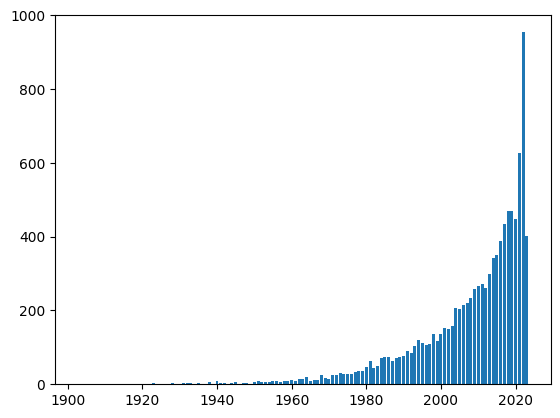

In [30]:
plt.bar(years_dict.keys(), years_dict.values())

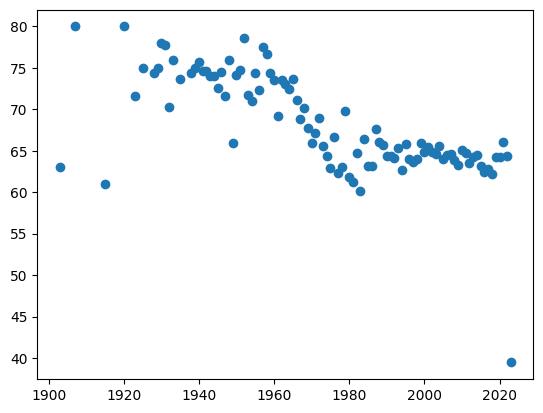

In [49]:
plt.scatter(years_dict.keys(), [numpy.mean(years_scores[years_scores[:, 0] == val][:, 1]) for val in years_dict.keys()])

In [33]:
countries = data['country'].values
countries

array(['AU', 'AU', 'AU', ..., 'US', 'US', 'GB'], dtype=object)

In [38]:
dict(zip(list(set(countries)), range(len(list(set(countries))))))

{'DK': 0,
 'UA': 1,
 'AU': 2,
 'NL': 3,
 'BE': 4,
 'DE': 5,
 'IN': 6,
 'PE': 7,
 'VN': 8,
 'SU': 9,
 'GT': 10,
 'MX': 11,
 'US': 12,
 'ZA': 13,
 'CZ': 14,
 'SG': 15,
 'IS': 16,
 'BO': 17,
 'GR': 18,
 'AR': 19,
 'FR': 20,
 'ES': 21,
 'CA': 22,
 'PY': 23,
 'DO': 24,
 'KH': 25,
 'HK': 26,
 'MY': 27,
 'FI': 28,
 'TW': 29,
 'RU': 30,
 'SK': 31,
 'BR': 32,
 'IE': 33,
 'LV': 34,
 'AT': 35,
 'NO': 36,
 'JP': 37,
 'TH': 38,
 'CN': 39,
 'PH': 40,
 'TR': 41,
 'BY': 42,
 'PT': 43,
 'PL': 44,
 'XC': 45,
 'ID': 46,
 'UY': 47,
 'MU': 48,
 'SE': 49,
 'PR': 50,
 'IR': 51,
 'KR': 52,
 'CH': 53,
 'GB': 54,
 'IL': 55,
 'HU': 56,
 'IT': 57,
 'CO': 58,
 'CL': 59}

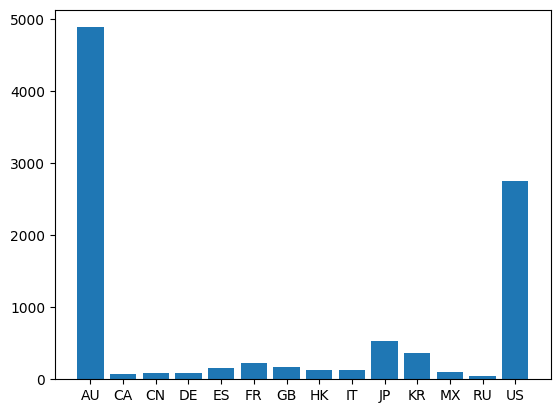

In [45]:
num_of_movies = 50
a, b = numpy.unique(countries, return_counts=True)
sm_data = list(zip(a, b))
sm_data = [val for val in sm_data if val[1] > num_of_movies]
a, b = [val[0] for val in sm_data], [val[1] for val in sm_data]
plt.bar(a, b)
plt.show()